In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
stats = dict()
with open("arena_corr_SB.txt", "r") as file:
    for line in file:
        data = eval(line.strip())
        if data["name"] not in stats:
            stats[data["name"]] = []
        stats[data["name"]].append({
            "steps": data["steps"],
            # "n_aborts": data["n_aborts"],
            "n_successes": data["n_successes"],
        })

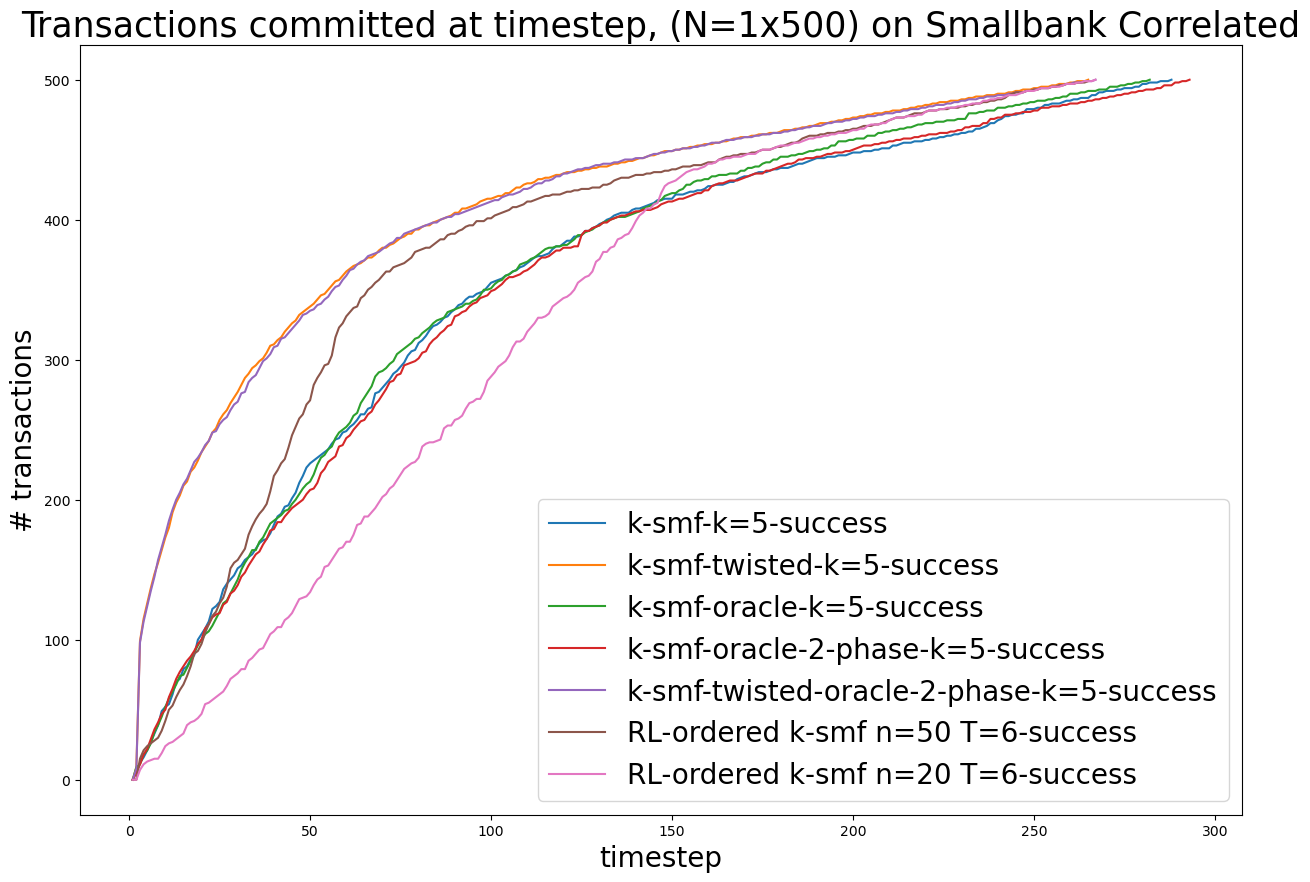

In [19]:
plt.figure(figsize=(15,10))
t_cutoff = 600
for contestant in stats.keys():
    plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], 
        [elem["n_successes"] for elem in stats[contestant] if elem["steps"] < t_cutoff], 
        label=f"{contestant}-success")
    

    # plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-aborts")
plt.xlabel("timestep", size=20) 
plt.ylabel("# transactions", size=20)
plt.legend(loc='lower right', prop={'size': 20})
plt.title("Transactions committed at timestep, (N=1x500) on Smallbank Correlated", size=25)
plt.show()